# Aula 3.8.1 - Classification Basics - Metrics - Model Test Pipeline

Fala galera! Na aula de hoje, entraremos num capítulo que trata de um dos problemas mais comuns para Machine Learning: classificação! Em problemas de classifcação, temos um dataset com elementos de diversas classes e temos que ser capazes de discerní-los. Podemos dividir esse problema em 3 tipos:
 - **Classificação Binária**: atribuir um datapoint como pertencente a 1 de 2 classes.
 - **Classificação Multiclasse**: atribuir um datapoint como pertencente a 1 de n classes, n > 2.
 - **Classificação Multilabel**: atribuir um datapoint como pertence a n de m classes, m > n. <br>
Nessas 2 primeiras aulas, nosso foco será em classificação binária. Porém, antes de atacarmos um problema em específico, vamos esclarecer um conceito importantíssimo para classificação:

# Sobre matrizes de confusão e suas métricas

Numa classificação binária, temos 4 possíveis *outputs*: True Positive, False Positive, False Negative e True Negative. Podemos visualizar esses outputs numa matriz de confusão como essa: 

<img src="imgs/confusion_matrix.png" align="left" width="100%">

<br>

Como podemos observar acima, trabalhamos com 4 métricas sobre essa matriz de confusão. Elas são:
 - **Accuracy**: de tudo o que você classificou, qual parte você acertou. É a primeira métrica que olhamos, mas algumas vezes ela pode não responder nossas perguntas de modo satisfatório e ocultar o que está acontecendo com os erros.
 - **Precision**: fração dos dados categorizados positivamente que são, de fato, casos positivos. É útil para sabermos quão confiável é nossa previsão para positivo.
 - **Recall / Sensivity**: fração de dados positivos categorizados de fato como positivos. Mostra como nosso modelo enxerga os dados positivos
 - **Specificity**: fração de dados negativos categorizados de fato como negativos. Mostra como nosso modelo enxerga os dados negativos.

<br>
Para cada problema de classificação binária, é interessante utilizar uma ou mais dessas métricas. A ideia é que sempre tenhamos controle não só da nossa acurácia, mas como estamos acertando e errando com nosso modelo, de modo a entender como melhorá-lo e quais as consequências dele nas previsões. Além das 4 métricas acima, também utilizamos o F1 Score, que é um balanço entre Precision e Recall, calculado por F1 = 2*((precision * recall) / (precision + recall)). <br>
Com essas métricas em mãos, nos levamos à uma questão mais primordial: como escolher uma métrica para meu problema? Embora não exista uma resposta pronta para essa pergunta, é sempre interessante observarmos acurácia, precision e recall, juntas, para termos um entendimento do que está acontecendo :) <br>
Separei alguns links para vocês irem mais a fundo nesse assunto de interpretar e escolher métricas:

 - __[Classification Accuracy is Not Enough: More Performance Measures You Can Use](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)__
 - __[Data Science Performance Metrics for Everyone](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)__
 - __[Measuring Model Goodness — Part 1](https://towardsdatascience.com/measuring-model-goodness-part-1-a24ed4d62f71)__
 - __[The 3 Pillars of Binary Classification: Accuracy, Precision & Recall](https://medium.com/@yashwant140393/the-3-pillars-of-binary-classification-accuracy-precision-recall-d2da3d09f664)__

# Let's save some lifes

Na aula de hoje, vamos trabalhar com o Breast Cancer Dataset. Ao invés de fazer o download, vamos aproveitar o módulo datasets do scikit! Esse dataset contém 13 atributos e 2 possíveis outcomes: M (Malign) ou B (Benign). Nossa tarefa será, a partir dos features, conseguir prever o tipo de tumor de cada paciente. Vamos primeiro fazer o loading do dataset:

In [3]:
# Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
# Import scikit-learn dataset library
from sklearn import datasets

# Load dataset
cancer = datasets.load_breast_cancer()

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancer.data.shape

(569, 30)

In [14]:
pd.DataFrame(cancer.data, columns = cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Ok, agora precisamos realizar o `train_test_split` dos nossos dados, uma vez que voltamos a realizar aprendizado supervisionado. Vamos fazer um split 80-20. Recomendo utilizar as aulas anteriores para isso! Na célula abaixo, realize o train-test-split criando 4 variáveis: X_train, X_test, y_train, y_test. Para reproducibilidade, vamos no tradicional random_state de 42, já que é a resposta para tudo.

In [15]:
# %load solutions/solution_00.py

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42) 

Com nosso dados de treino e test, estamos prontos para aplicar nossos métodos de classificação! Vamos implementar uma logística e observar os resultados segundo as métricas que discutimos mais acima:

In [16]:
# %load solutions/solution_01.py
#Import Logictic Regression model
from sklearn.linear_model import LogisticRegression

#Create a logistic regression Classifier
clf = LogisticRegression()

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

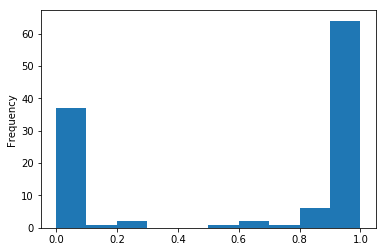

In [18]:
pd.DataFrame(clf.predict_proba(X_test), columns=['zero', 'um'])['um'].plot.hist()

Legal, montamos nosso modelo de regressão logística. Vamos montar a matriz de confusão dados os outputs do modelo e nossos targets. Para tal, importe o módulo `metrics` do scikit e crie uma variável cnf_matrix que recebe metrics.confusion_matrix(). Essa __[classe](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)__ recebe 2 argumentos: y_test e y_pred. Por fim, faça o `print()` da matriz!

In [19]:
# %load solutions/solution_02.py

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[39,  4],
       [ 1, 70]], dtype=int64)

Parece então que temos 39 TP, 4 FP, 1 FN e 70 TN. Vamos puxar as métricas accuracy, precision e recall chamando os respectivos métodos de `metrics`. Eles são `.accuracy_score()`, `.precision_score()` e `.recall_score()`. Todos eles recebem 2 argumentos: y_test e y_pred. Faça o print das 3 métricas: 

In [20]:
# %load solutions/solution_03.py
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

metrics.f1_score(y_test, y_pred)

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465


0.9655172413793103

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
results = cross_val_score(clf, cancer.data, cancer.target, cv = 10, scoring='recall' )

In [34]:
results.mean(), results.std()

(0.9718253968253968, 0.018074514727661813)

In [36]:
import sklearn

In [37]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

Olha só! Parece que fizemos um modelo muito bom para prever o perfil do câncer de mama dos datapoints observados! Nossas 3 métricas estão top-notch, todas acima de 90%. Essa é a maneira artesanal de fazer um classificador. Vamos para algo mais emocionante.

## Let's save some lifes again

Para esse exercício, usaremos o __[dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)__ de diabetes da população indiana. Vamos explorar um pouco dele! Entre no link do Kaggle e faça o download do dataset na pasta data dessa aula.

In [39]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Parece que temos 1 para casos positivos de diabetes e 0 para casos negativos. Num problema de classificação, é **muito importante que, sempre que possível, façamos o balanceamento de classes, senão o modelo aprenderá de modo enviesado**. Na célula abaixo, vamos realizar um `.groupby()` em label seguido de um `.count()` para checar se nosso dataset está balanceado.

In [40]:
pima.groupby('label').glucose.count()

label
0    500
1    268
Name: glucose, dtype: int64

Ok, ele não está balanceado 50-50, mas pelo menos ele não está ordens de grandeza desbalanceado. Vamos seguir como ele está, observar os resultados e então decidir se vale a pena balancea-lo ou aplicar outras transformações. Abaixo, realize o train-test-split da mesma forma que o exercício anterior:

In [41]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [45]:
# %load solutions/solution_04.py
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos aplicar a Regressão logística da mesma maneira. Ao final da construção das predictions, já chame as 3 métricas básicas de classificação binária!

In [43]:
# %load solutions/solution_05.py

# Create a svm Classifier
clf = LogisticRegression()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Print the 3 main binary classification metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182


Ok, dessa vez nossos resultados não deram tão certo...será que a regressão logística está realizando seu trabalho? Podemos observar isso pelo plot da curva ROC:

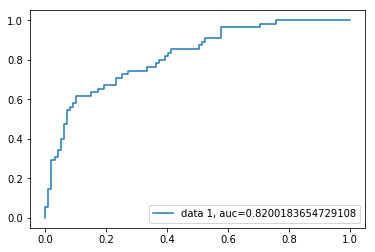

In [67]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

Uma coisa que podemos fazer é resolver esse problema na força bruta: puxar um monte de modelos, testar no nosso dataset e ver o que se sai melhor. Isso parece meio burro, mas realmente fazemos isso no nosso dia-a-dia: por que testar um modelo se podemos testar vários ao mesmo tempo?

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]


for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.7142857142857143
Precision: 0.5901639344262295
Recall: 0.6545454545454545
GaussianNB
****Results****
Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091
LogisticRegression
****Results****
Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182
SVC
****Results****
Accuracy: 0.6428571428571429
Precision: 0.0
Recall: 0.0
DecisionTreeClassifier
****Results****
Accuracy: 0.7532467532467533
Precision: 0.6231884057971014
Recall: 0.7818181818181819
RandomForestClassifier
****Results****
Accuracy: 0.7597402597402597
Precision: 0.6607142857142857
Recall: 0.6727272727272727
GradientBoostingClassifier
****Results****
Accuracy: 0.7532467532467533
Precision: 0.6349206349206349
Recall: 0.7272727272727273


/home/abelardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abelardo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/abelardo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/abelardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fu

É desse jeito que testamos vários modelos ao mesmo tempo, para então analisar seus outputs. Dados os resultados acima, qual classificador você escolheria? Existe mais de uma resposta certa para essa pergunta. Pessoalmente, eu pegaria o Naive-Bayes ou a Decision Tree. <br>
Podemos observar também que os algoritmos apresentam performances semelhantes. Será que não vale a pena voltar ao dataset e tomar decisões sobre ele? Por exemplo, realizar um balanceamento e scaling devidos? Fica então o desafio para vocês melhorarem a performance não utilizando métodos mais complexos, mas usando o feijão com arroz que aprendemos até agora que é ter carinho e atenção com os dados:

In [26]:
pima.head(1)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1


In [33]:
pima_0 = pima[pima.label==0]
pima_1 = pima[pima.label==1]

In [34]:
len(pima_0)

500

In [36]:
pima_0 = pima_0.sample(n=268, replace=True)
len(pima_0)

268

In [39]:
pima = pd.concat([pima_0, pima_1], ignore_index=True)

In [40]:
pima.groupby('label').pregnant.count()

label
0    268
1    268
Name: pregnant, dtype: int64

In [41]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]


for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.7962962962962963
Precision: 0.7755102040816326
Recall: 0.7755102040816326
GaussianNB
****Results****
Accuracy: 0.7407407407407407
Precision: 0.7142857142857143
Recall: 0.7142857142857143
LogisticRegression
****Results****
Accuracy: 0.7777777777777778
Precision: 0.7358490566037735
Recall: 0.7959183673469388
SVC
****Results****
Accuracy: 0.6666666666666666
Precision: 0.5764705882352941
Recall: 1.0
DecisionTreeClassifier
****Results****
Accuracy: 0.7685185185185185
Precision: 0.7222222222222222
Recall: 0.7959183673469388
RandomForestClassifier
****Results****
Accuracy: 0.8055555555555556
Precision: 0.75
Recall: 0.8571428571428571
GradientBoostingClassifier
****Results****
Accuracy: 0.7870370370370371
Precision: 0.7407407407407407
Recall: 0.8163265306122449


/home/abelardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abelardo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/abelardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
